<a href="https://colab.research.google.com/github/TirendazAcademy/NLP-with-Transformers/blob/main/Twitter%20Sentiment%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# How to Perform a Twitter Sentiment Analysis with Snscrape and Hugging Face

What do football lovers think about the FIFA World Cup 2022? To find out that, I'll perform a Twitter sentiment analysis using the hashtag #WorldCup2022 on Twitter. Here are what I'll cover in this blog:

- What is Sentiment Analysis?
- What is Social Media Scraping?
- How to scrape with Snscrape?
- How to perform Twitter sentiment analysis?

Let's get started!

# How to scrape with snscrape?

First, let's take a look at how to scrape the tweets with Snscrape.

In [1]:
!pip install snscrape

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import snscrape.modules.twitter as sntwitter
import pandas as pd

# Creating a list to append all tweet attributes(data)
tweets = []

# Creating query
query = '#WorldCup2022 lang:en since:2022-11-20 until:2022-11-27'
q = sntwitter.TwitterSearchScraper(query)

# Using TwitterSearchScraper to scrape data and append tweets to list
for i,tweet in enumerate(q.get_items()):
    if i>1000:
        break
    tweets.append([tweet.user.username, tweet.date, tweet.likeCount, tweet.sourceLabel, tweet.content])

# Converting data to dataframe
tweets_df = pd.DataFrame(tweets, columns=["User", "Date Created", "Number of Likes", "Source of Tweet", "Tweet"])
tweets_df.head()

,User,Date Created,Number of Likes,Source of Tweet,Tweet
0,RedFalcon_SS,2022-11-26 23:58:09+00:00,4,Twitter Web App,Predictions for tomorrow #WorldCup2022:\n\n🇯🇵 ...
1,StatinDaObvious,2022-11-26 23:57:57+00:00,0,Twitter for Android,Good and terrible! #WorldCup2022 https://t.co/...
2,AmeliaHanslow,2022-11-26 23:57:20+00:00,0,Twitter for Android,#Mbappe - yet again I think my favourite playe...
3,Sadiq_diggi,2022-11-26 23:55:58+00:00,1,Twitter for iPhone,Some days @AntoGriezmann is the best football...
4,frankmiller_86,2022-11-26 23:55:53+00:00,3,Twitter for Android,🚨🚨🚨 BREAKING: Protesters in China's Lanzhou Ci...


# Twitter Sentiment Analysis with Hugging Face

Let's import the model we'll use for Twitter sentiment analysis.

In [3]:
!pip install transformers
from transformers import pipeline
sentiment_analysis = pipeline(model="cardiffnlp/twitter-roberta-base-sentiment-latest")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


After that let's find out the sentiment in each tweet with the for loop.

In [4]:
# Creating a list to append all tweet attributes(data)
tweet_sa = []

# Creating query
query = '#WorldCup2022 lang:en since:2022-11-20 until:2022-11-27'
q = sntwitter.TwitterSearchScraper(query)

# Predicting the sentiments of tweets
for i,tweet in enumerate(q.get_items()):
    if i>10000:
        break
    content = tweet.content
    sentiment = sentiment_analysis(content)
    tweet_sa.append({'tweet': content, 'sentiment': sentiment[0]['label'], 'date':tweet.date})

Let's convert data into a dataframe.

In [5]:
import pandas as pd
pd.set_option('max_colwidth', None)

# Converting data to dataframe
df = pd.DataFrame(tweet_sa)
df.head()

,tweet,sentiment,date
0,Predictions for tomorrow #WorldCup2022:\n\n🇯🇵 Japan vs 🇨🇷 Costa Rica\n( 3 - 0 )\n🇧🇪 Belgium vs 🇲🇦 Morocco\n( 1 - 1)\n🇭🇷 Croatia vs 🇨🇦 Canada\n( 2 - 1 )\n🇪🇸 Spain vs 🇩🇪 Germany\n( 1 - 1 ),neutral,2022-11-26 23:58:09+00:00
1,Good and terrible! #WorldCup2022 https://t.co/MEtxyE2HmZ,negative,2022-11-26 23:57:57+00:00
2,#Mbappe - yet again I think my favourite player is from Les Bleus. #MitchellDuke right up there though. #WorldCup2022,positive,2022-11-26 23:57:20+00:00
3,Some days @AntoGriezmann is the best footballer of the world. Today is one of these days. #FRA #FRADAN #WorldCup2022 https://t.co/LixcB8iuHP,positive,2022-11-26 23:55:58+00:00
4,🚨🚨🚨 BREAKING: Protesters in China's Lanzhou City are taking to the streets and tearing down the COVID Test Booths NOW!\n\n🔊Sound 🔥🔥🔥 ...\n\n#Apple #Foxconn #Foxconnriot #chinalockdown #BREAKING #BreakingNews #UPDATE\n#twitter #twitterthreads #twitterthread #news\n#worldcup2022 https://t.co/jxUyHNb7qk,neutral,2022-11-26 23:55:53+00:00


In [6]:
df.tail()

,tweet,sentiment,date
9996,"Non #Baylor tweet, but the #USMNT has played out of their G.D. mind in this 1st half. #ENG fortunate to not be down. #WorldCup2022",positive,2022-11-25 19:44:01+00:00
9997,"So, if the England vs. USA game ends in a tie (draw): Does England lose to Wales on purpose? (Or… is that the equivalent of Texas losing to Vermont on purpose in a World Cup match)? #WorldCup2022",neutral,2022-11-25 19:44:01+00:00
9998,Qatar become just the second FIFA World Cup host nation to be eliminated from the Group Stage of the tournament after losing to 3-1 to Senegal.\n\nPowered by Vision Care \n\n#FIFA #WorldCup2022 #Football #Qatar #DailyMirror #DailyMirrorOnline #MirrorSports #StayTuned #VisionCare https://t.co/NCjZRBt0hM,negative,2022-11-25 19:44:00+00:00
9999,Cutout Bikini Swimsuit\nBuy 1 Get 1 +24% OFF Discount(CODE:zftw18)\n2🩱=$12.15\nLink:https://t.co/ApHdgubr4J\n\n#WorldCup #WorldCup2022 #UFC280 #taksim #Yellowstone #offset #PriyAnkit #AMAs2022 #YetToCome #irfanpathan #harisrauf #taksim #XRP #RHOP https://t.co/0t7DHOByQR,neutral,2022-11-25 19:44:00+00:00
10000,Let’s go USA !!! #WorldCup2022,positive,2022-11-25 19:43:58+00:00


# Data Visualization

First, let's count the number of tweets by sentiments.

In [7]:
import matplotlib.pyplot as plt

sentiment_counts = df.groupby(['sentiment']).size()
print(sentiment_counts)

sentiment
negative    2123
neutral     3813
positive    4065
dtype: int64


Now let's draw a pie plot for the sentiments.

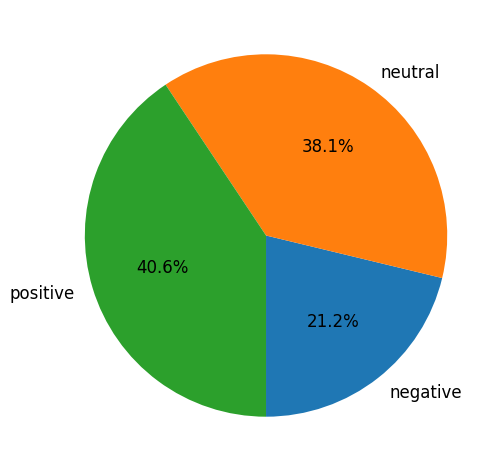

In [8]:
# Let's visualize the sentiments
fig = plt.figure(figsize=(6,6), dpi=100)
ax = plt.subplot()
sentiment_counts.plot.pie(ax=ax, autopct='%1.1f%%', startangle=270, fontsize=12, label="")

Let's create a world cloud with positive tweets.

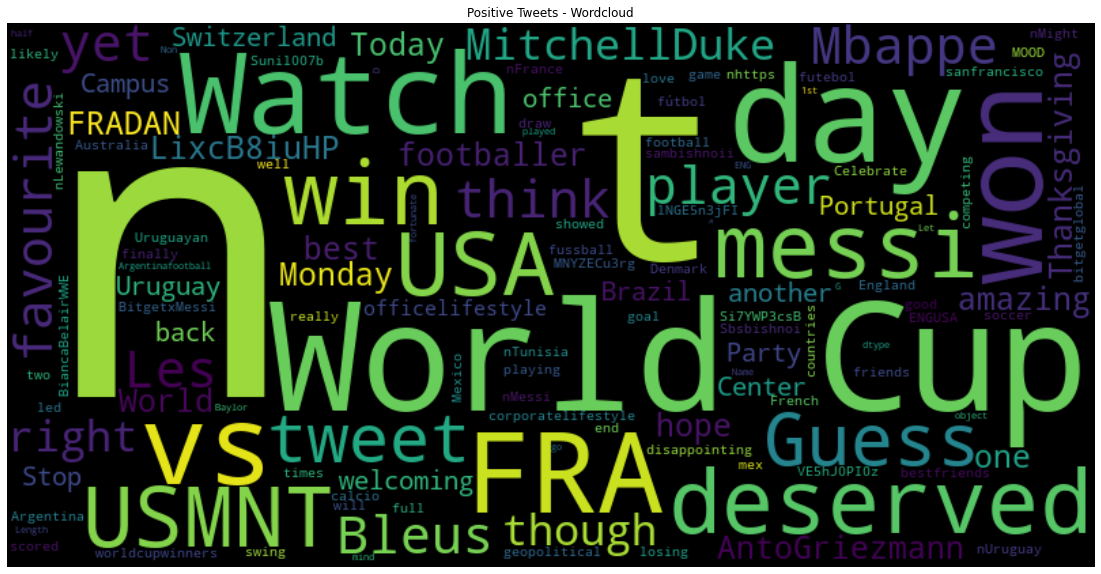

In [9]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

# Wordcloud with positive tweets
positive_tweets = df['tweet'][df["sentiment"] == 'positive']
stop_words = ["https", "co", "RT", "WorldCup2022"] + list(STOPWORDS)
positive_wordcloud = WordCloud(width=800, height=400, background_color="black", stopwords = stop_words).generate(str(positive_tweets))
plt.figure(figsize=[20,10])
plt.title("Positive Tweets - Wordcloud")
plt.imshow(positive_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Next, let's create a world cloud with positive tweets.

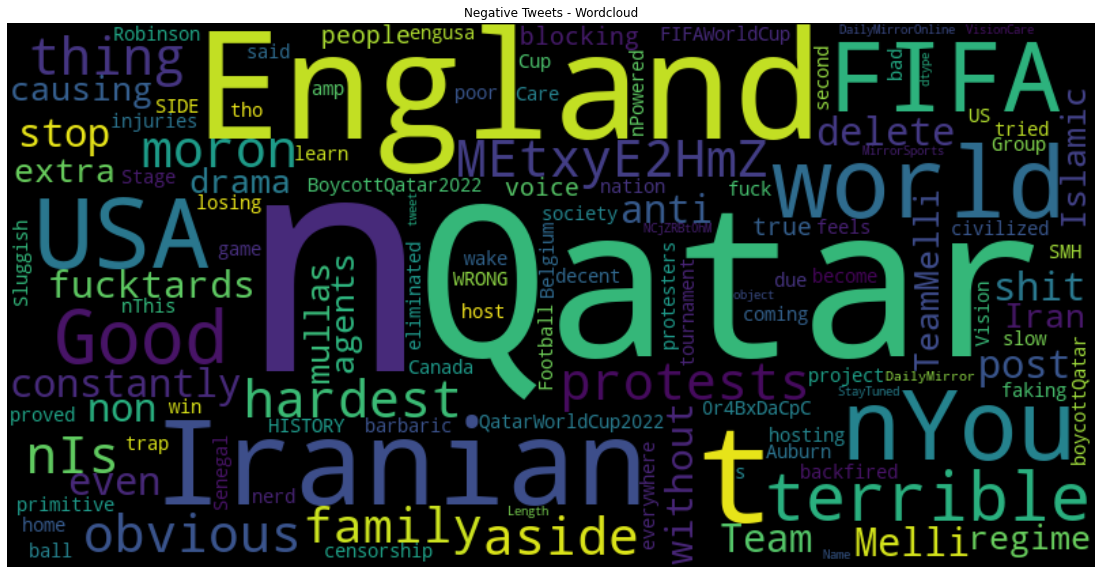

In [10]:
# Wordcloud with negative tweets
negative_tweets = df['tweet'][df["sentiment"] == 'negative']
stop_words = ["https", "co", "RT", "WorldCup2022"] + list(STOPWORDS)
negative_wordcloud = WordCloud(width=800, height=400, background_color="black", stopwords = stop_words).generate(str(negative_tweets))
plt.figure(figsize=[20,10])
plt.title("Negative Tweets - Wordcloud")
plt.imshow(negative_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

That's it. Thanks for reading. I hope you enjoy it. You can find the notebook I used on this blog here. Don't forget to follow us on [YouTube](https://youtube.com/tirendazacademy) | [Twitter](https://twitter.com/TirendazAcademy) | [Instagram](https://www.instagram.com/tirendazacademy/) | [TikTok](https://www.tiktok.com/@tirendazacademy) 👍